# Importing Required Libraries

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
x_train = np.genfromtxt('x_train.csv', delimiter = ',')[1:, 1:]
x_validate = np.genfromtxt('x_validate.csv', delimiter = ',')[1:, 1:]
x_test = np.genfromtxt('x_test.csv', delimiter = ',')[1:, 1:]

In [3]:
y_train = np.genfromtxt('y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

y_validate = np.genfromtxt('y_validate.csv', delimiter = ',')[1:, 1:]
y_validate = y_validate.reshape(y_validate.shape[0])

# Base Line Model (Without optimization)

In [9]:
clf = SGDClassifier(random_state = 0)
clf.fit(x_train, y_train)
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [37]:
print(classification_report(y_test, y_pred_test))
print("\n\nAccuracy Score : ", accuracy_score(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99       879
         2.0       1.00      1.00      1.00       888
         3.0       0.98      0.98      0.98       878
         4.0       0.90      0.91      0.91       897
         5.0       1.00      0.99      1.00       874
         6.0       0.95      0.97      0.96       883
         7.0       0.91      0.93      0.92       898
         8.0       1.00      0.96      0.98       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040



Accuracy Score :  0.9661931818181818


In [11]:
print("Train Accuracy : ", accuracy_score(y_train, y_pred_train))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_test))

Train Accuracy :  0.9733515372168284
Test Accuracy :  0.9661931818181818


In [12]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix : 

[[870   0   3   1   0   5   0   0]
 [  0 884   0   2   0   2   0   0]
 [  0   0 864  12   0   2   0   0]
 [  0   0   5 814   0   4  71   3]
 [  0   0   0   0 869   5   0   0]
 [  0   2   7  10   0 859   5   0]
 [  0   0   0  39   0  27 832   0]
 [  0   0   5  22   0   0   6 810]]


# Parameter Tuning

## Effect of Loss in SGD Classifier

In [19]:
losses = ['hinge', 'log', 'modified_huber', 'perceptron']
val_Acc = list()
train_Acc = list()
for l in losses:
    print("Loss :", l, end = ',   ')
    clf = SGDClassifier(random_state = 0, loss = l, max_iter = 10000)
    clf.fit(x_train, y_train)
    y_pred_val = clf.predict(x_validate)
    y_pred_train = clf.predict(x_train)
    val_Acc.append(accuracy_score(y_validate, y_pred_val))
    train_Acc.append(accuracy_score(y_train, y_pred_train))

Loss : hinge,   Loss : log,   Loss : modified_huber,   Loss : perceptron,   

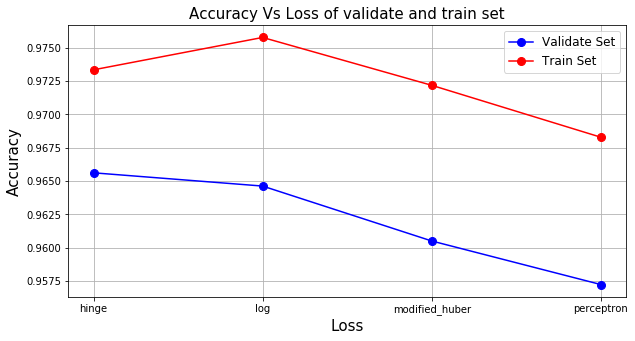

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(losses, val_Acc, marker = 'o', markersize = 8, color = 'blue', label = 'Validate Set')
ax.plot(losses, train_Acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('Loss', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Loss of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

## Effect of learning rate on Accuracy

In [35]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
val_Acc = list()
train_Acc = list()
for l in alphas:
    print("Alpha :", l, end = ',   ')
    clf = SGDClassifier(random_state = 0, alpha = l, max_iter = 10000)
    clf.fit(x_train, y_train)
    y_pred_val = clf.predict(x_validate)
    y_pred_train = clf.predict(x_train)
    val_Acc.append(accuracy_score(y_validate, y_pred_val))
    train_Acc.append(accuracy_score(y_train, y_pred_train))

Alpha : 0.0001,   Alpha : 0.0005,   Alpha : 0.001,   Alpha : 0.005,   Alpha : 0.01,   Alpha : 0.05,   Alpha : 0.1,   Alpha : 0.5,   Alpha : 1,   Alpha : 5,   Alpha : 10,   Alpha : 50,   

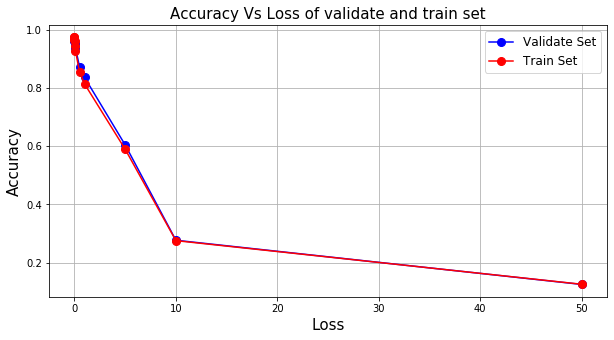

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(alphas, val_Acc, marker = 'o', markersize = 8, color = 'blue', label = 'Validate Set')
ax.plot(alphas, train_Acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('Loss', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Loss of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

In [47]:
def parameter_tuning(x_train, y_train, x_validate, y_validate):
    alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
    losses = ['hinge', 'log', 'modified_huber', 'perceptron']
    learning_rate = ['optimal', 'constant', 'invscaling', 'adaptive']
    acc = -1
    optimal_loss = ''
    optimal_alpha = -1
    optimal_learning_rate = ''
    for l in losses:
        for a in alphas:
            for lr in learning_rate:
                if lr == 'optimal':
                    eta0 = 0.0
                else:
                    eta0 = 1
                clf = SGDClassifier(loss = l, alpha = a, learning_rate = lr, eta0 = eta0, random_state = 0)
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_validate)
                if accuracy_score(y_validate, y_pred) > acc:
                    acc = accuracy_score(y_validate, y_pred)
                    optimal_alpha = a
                    optimal_loss = l
                    optimal_learning_rate = lr
    return optimal_alpha, optimal_loss, optimal_learning_rate

In [48]:
optimal_alpha, optimal_loss, optimal_learning_rate = parameter_tuning(x_train, y_train, x_validate, y_validate)

In [50]:
print("optimal_alpha : ", optimal_alpha)
print("optimal_loss : ", optimal_loss)
print("learning_rate : ", optimal_learning_rate)

optimal_alpha :  0.0005
optimal_loss :  log
learning_rate :  adaptive


In [58]:
clf = SGDClassifier(loss = optimal_loss, alpha = optimal_alpha, learning_rate = optimal_learning_rate, eta0 = 1, random_state = 0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.99      1.00       879
         2.0       1.00      1.00      1.00       888
         3.0       0.98      0.98      0.98       878
         4.0       0.91      0.93      0.92       897
         5.0       0.99      1.00      0.99       874
         6.0       0.96      0.97      0.96       883
         7.0       0.94      0.91      0.92       898
         8.0       0.99      0.98      0.99       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040



In [62]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y_test, y_pred))

Accuracy Score : 0.9694602272727273


Confusion Matrix : 

 [[874   0   3   0   0   2   0   0]
 [  0 887   1   0   0   0   0   0]
 [  0   0 862  12   1   2   0   1]
 [  0   0  10 834   1   3  44   5]
 [  0   0   0   0 871   3   0   0]
 [  0   4   7   4   2 856  10   0]
 [  0   0   0  51   4  27 816   0]
 [  0   0   1  15   0   0   2 825]]


Text(114.0, 0.5, 'Actual Class')

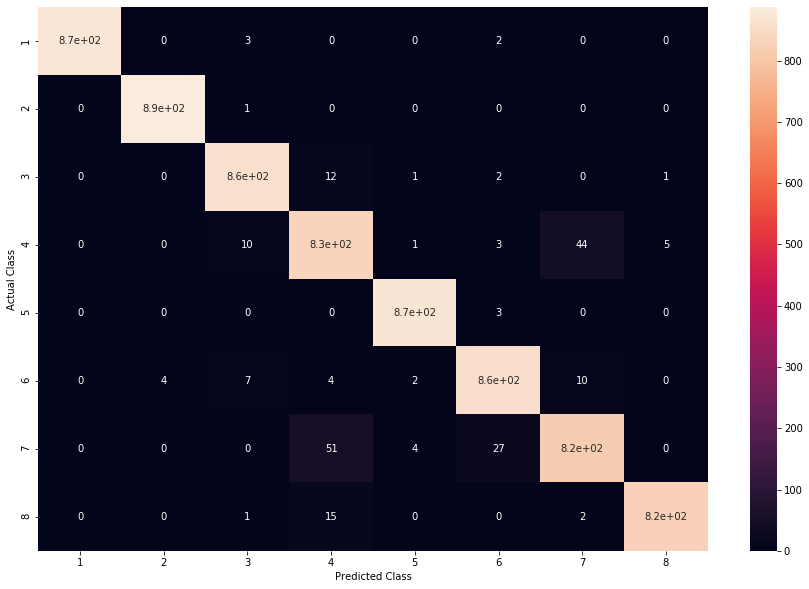

In [67]:
# visualization of the predicted class vs actual class (0 based indexing)
plt.figure(figsize = (15, 10))
classes = [i for i in range(1, 9)]
svm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = classes, columns = classes)
sns.heatmap(svm_df, annot = True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

In [68]:
# Optimal Accuracy Score = 0.97